In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## 1. Write a Python program to view some basic statistical details like percentile, mean, std etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.

In [2]:

df = pd.read_csv('iris.csv')
df[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
for i in df.species.unique():
    print(f'\n{i.upper()}\n',df.groupby('species').get_group(f'{i}').describe())


SETOSA
        sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

VERSICOLOR
        sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.30000

## 2. Write a Python program to create a scatter plot using sepal length and petal_width to separate the Species classes.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

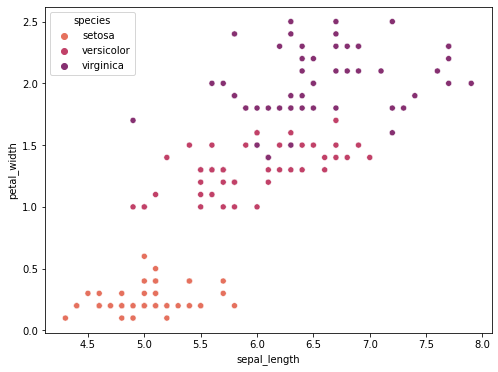

In [4]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='sepal_length',y='petal_width',data=df,hue='species',palette='flare',markers='D')

## OR

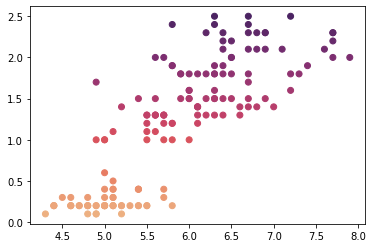

In [5]:
x = df.iloc[:,:-1].values
y = df.iloc[:,3].values
plt.scatter(x[:,0],x[:,3],c=y,cmap='flare')

## 3. In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors').

In [6]:
df[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Here we have a categorical data in species which is our output data, we need to convert it into numerical


In [7]:
df['species'].replace(['setosa','versicolor','virginica'],[0,1,2],inplace=True)
df[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [8]:
# input data
x = df.loc[:,['sepal_length','sepal_width','sepal_width','petal_width']]


# output data
y = df['species']


In [9]:
# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [10]:
# training:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [12]:
model.score(X_test,y_test)*100

100.0